<a href="https://colab.research.google.com/github/FilipeSquire/Statistics-Tools/blob/main/Apriori_Algorithm_ProductAffinity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Priory algorithm is a data mining technique for identifying the frequent itemsets and relevant
association rules in the database. Support, confidence and lift are the main components

We will go over the following steps in order to implement the technique:

Step 1 > we will create a frequency table of items in the transactions

Step 2 > we will make all the possible pair of items and the order of agrupaments inst important

Step 3 > now we will make a frequency for how many times each agrupaments happens

You need to run the algorithm every time for each addiction of agruppament (X,Y) > (X,Y,Z) > (X,Y,Z,W)
this way the overall performance reduces

In [ ]:
#We will use a csv taken from kaggle https://www.kaggle.com/irfanasrullah/groceries

import csv
# you can find the data used in this example at this link: https://docs.google.com/spreadsheets/d/1qJAjMQihOvxXOlUQ_TBHixJ5ldCV8a71/edit#gid=974812866
with open('C:/Users/...', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import pandas as pd

#data processing

encode = mlxtend.preprocessing.TransactionEncoder()
encode_arr = encode.fit_transform(data)

print(encode_arr)

[[False False False ... False False False]
 [False False False ... False  True False]
 [False False False ...  True False False]
 ...
 [False False False ... False  True False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [ ]:
#Converting to dataframe
encode_df = pd.DataFrame(encode_arr,columns=encode.columns_)
encode_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Calculating support
md = mlxtend.frequent_patterns.apriori(encode_df)
md_minsup= mlxtend.frequent_patterns.apriori(encode_df,
                                            min_support=0.01,
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [ ]:
#Creating rules for Confidence

rules = mlxtend.frequent_patterns.association_rules(
md_minsup, metric='confidence',min_threshold=0.06,support_only=False)

rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
6,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
7,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
8,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222
9,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275


In [ ]:
#Creating rules for Lift
rules2=mlxtend.frequent_patterns.association_rules(
md_minsup, metric='lift',min_threshold=0.06,support_only=False)

rules2.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
6,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487
7,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
8,(yogurt),(beef),0.139502,0.052466,0.011693,0.083819,1.597601,0.004374,1.034222
9,(beef),(yogurt),0.052466,0.139502,0.011693,0.222868,1.597601,0.004374,1.107275


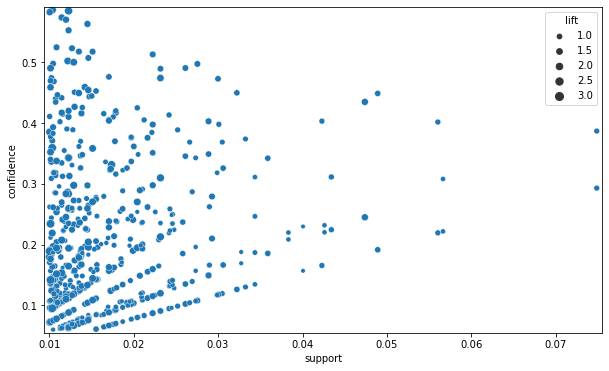

In [ ]:
#Scatter plot

import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x='support', y='confidence',
               size='lift', data = rules)
plt.margins(0.01,0.01)
plt.show()